# Good resource here for multivariate anomaly detection:
http://odds.cs.stonybrook.edu/#table1

In [1]:
import torch
print(torch.__version__)

1.13.1+cpu


In [2]:
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
# import qiskit
# qiskit.__qiskit_version__


# Data analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def converted_data_frame(theData,cutoff): ## theData is a np.array format
    theData[:,-1][theData[:,-1] <= cutoff] = int(0)
    theData[:,-1][theData[:,-1] != 0] = int(1)
    return theData

def convert_data_frame(numpyArray):
    column_head=[]
    for i in range(0, numpyArray.shape[1]-1):
        column_head.append("dim_"+str(i))
    column_head.append("label") 
    panda_df = pd.DataFrame(data = numpyArray, 
                            #index = ["Row_1", "Row_2"], 
                            columns = column_head)
    return panda_df
    

In [5]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt 
# import scipy.io
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# def converted_data_frame(theData,cutoff_1, cutoff_2): ## theData is a np.array format
    
#     for i in range(0, len(theData[:,-1])):
#         if theData[:,-1][i] <= cutoff_1:
#             theData[:,-1][i]= int(0)
#         elif (theData[:,-1][i] > cutoff_1) and (theData[:,-1][i] <= cutoff_2):
#             theData[:,-1][i]= int(2)
#         else:
#             theData[:,-1][i]= int(1)
#     return theData

# def convert_data_frame(numpyArray):
#     column_head=[]
#     for i in range(0, numpyArray.shape[1]-1):
#         column_head.append("dim_"+str(i))
#     column_head.append("label") 
#     panda_df = pd.DataFrame(data = numpyArray, 
#                             #index = ["Row_1", "Row_2"], 
#                             columns = column_head)
#     return panda_df
    

In [6]:
import scipy
#satellite_mat = scipy.io.loadmat('satellite.mat')

In [7]:
# num_features = satellite_mat['X'].shape[1]
# satellite_df = pd.concat([pd.DataFrame(satellite_mat['X'], columns = ['dim_%s' % s for s in range(num_features)]),pd.DataFrame(satellite_mat['y'], columns=['label'])], axis=1)

In [8]:
theData=np.load("big_data_5000.npy")
converted_array=converted_data_frame(theData,0.5)
data_frame=convert_data_frame(converted_array)
satellite_df=data_frame
satellite_df.shape
### test_2 and 0.3

(5000, 161)

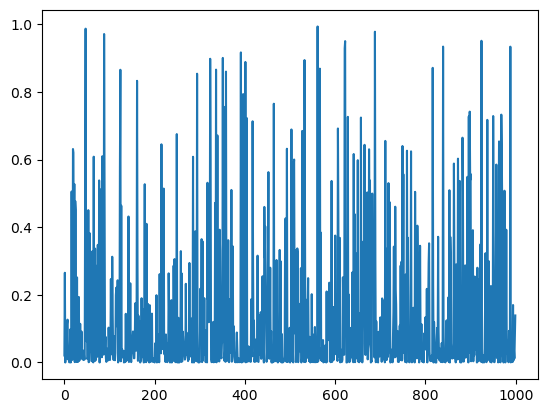

In [9]:
theData=np.load("big_data.npy")
last_column= theData[:,-1]
plt.plot(last_column)

In [10]:
satellite_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_151,dim_152,dim_153,dim_154,dim_155,dim_156,dim_157,dim_158,dim_159,label
0,180.0,171.0,5.0,152.0,117.0,175.0,181.0,179.0,68.0,84.0,...,146.0,170.0,151.0,51.0,83.0,180.0,79.0,198.0,40.0,0.0
1,184.0,182.0,69.0,76.0,87.0,55.0,135.0,181.0,48.0,194.0,...,139.0,198.0,52.0,25.0,80.0,117.0,53.0,80.0,6.0,0.0
2,6.0,146.0,159.0,144.0,63.0,110.0,39.0,91.0,43.0,83.0,...,134.0,151.0,163.0,161.0,86.0,128.0,73.0,9.0,92.0,0.0
3,103.0,44.0,164.0,33.0,4.0,3.0,10.0,19.0,110.0,21.0,...,92.0,145.0,130.0,158.0,167.0,138.0,136.0,135.0,69.0,0.0
4,144.0,113.0,144.0,23.0,176.0,37.0,180.0,67.0,32.0,29.0,...,198.0,18.0,161.0,97.0,101.0,189.0,42.0,128.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.0,193.0,127.0,54.0,188.0,19.0,154.0,66.0,167.0,9.0,...,16.0,105.0,159.0,195.0,24.0,112.0,57.0,3.0,123.0,0.0
4996,84.0,131.0,18.0,36.0,81.0,57.0,63.0,157.0,175.0,129.0,...,169.0,33.0,137.0,134.0,109.0,129.0,151.0,122.0,176.0,0.0
4997,89.0,20.0,56.0,171.0,90.0,68.0,179.0,175.0,199.0,29.0,...,40.0,112.0,37.0,171.0,71.0,27.0,48.0,92.0,131.0,0.0
4998,152.0,12.0,4.0,192.0,125.0,30.0,2.0,55.0,118.0,69.0,...,1.0,113.0,2.0,136.0,77.0,53.0,71.0,76.0,120.0,0.0


In [11]:
satellite_df_class_0 = satellite_df[satellite_df ["label"]==0]
satellite_df_class_1 = satellite_df[satellite_df["label"]==1]
satellite_df_class_2 = satellite_df[satellite_df["label"]==2]

print("num of class 0 =", len(satellite_df_class_0), "num of class 1 =", len(satellite_df_class_1), "num of class 2 =", len(satellite_df_class_2))

num of class 0 = 4570 num of class 1 = 430 num of class 2 = 0


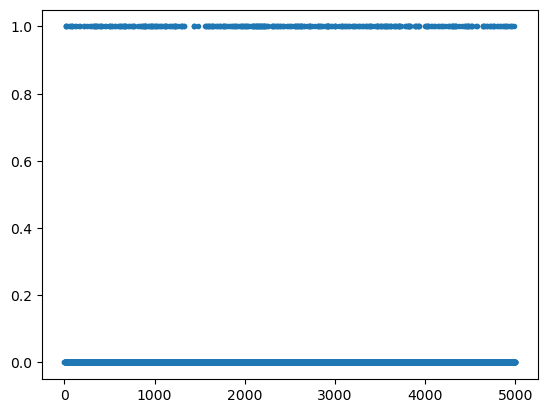

In [12]:
plt.plot(satellite_df ["label"], ".")

# drawing a sample of 900 normal and 100 anomal data

In [13]:
satellite_df_class_0 = satellite_df_class_0.sample(n=900)
satellite_df_class_1 = satellite_df_class_1.sample(n=100)

# define the new data frame

In [14]:
satellite_df_new_train=satellite_df_class_0[0:800]
satellite_df_new_test_1=satellite_df_class_1[0:100]
satellite_df_new_test_2=satellite_df_class_0[800:900]
satellite_df_new_test= pd.concat([satellite_df_new_test_1, satellite_df_new_test_2])

In [15]:
satellite_df_new_train

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_151,dim_152,dim_153,dim_154,dim_155,dim_156,dim_157,dim_158,dim_159,label
3344,65.0,141.0,193.0,178.0,33.0,168.0,123.0,162.0,121.0,130.0,...,7.0,94.0,95.0,98.0,82.0,151.0,175.0,101.0,129.0,0.0
4471,130.0,76.0,48.0,122.0,6.0,155.0,43.0,55.0,81.0,142.0,...,116.0,167.0,0.0,33.0,174.0,31.0,82.0,67.0,67.0,0.0
1194,70.0,86.0,4.0,69.0,187.0,34.0,2.0,6.0,90.0,17.0,...,81.0,152.0,186.0,174.0,88.0,111.0,60.0,118.0,32.0,0.0
292,34.0,1.0,2.0,154.0,196.0,10.0,181.0,17.0,7.0,32.0,...,114.0,89.0,187.0,125.0,62.0,134.0,63.0,190.0,81.0,0.0
3403,169.0,103.0,11.0,104.0,98.0,88.0,155.0,103.0,10.0,85.0,...,35.0,82.0,39.0,5.0,198.0,53.0,110.0,68.0,153.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,126.0,193.0,21.0,165.0,170.0,98.0,14.0,106.0,111.0,22.0,...,112.0,149.0,182.0,78.0,79.0,12.0,71.0,60.0,47.0,0.0
2282,79.0,82.0,14.0,17.0,131.0,125.0,134.0,92.0,174.0,28.0,...,167.0,185.0,159.0,0.0,21.0,148.0,72.0,158.0,133.0,0.0
2443,55.0,178.0,128.0,134.0,88.0,8.0,152.0,99.0,182.0,140.0,...,70.0,87.0,174.0,36.0,181.0,17.0,23.0,51.0,9.0,0.0
2876,89.0,99.0,33.0,74.0,145.0,6.0,11.0,134.0,135.0,9.0,...,186.0,63.0,193.0,155.0,2.0,74.0,170.0,171.0,76.0,0.0


# scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
train_df= satellite_df_new_train
test_df = satellite_df_new_test
test_df = test_df.sample(frac = 1)

In [18]:
np.array(test_df['label'])
np.array(train_df['label'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
from sklearn.preprocessing import MinMaxScaler
satellite_scaler = MinMaxScaler()

In [20]:
trainX = train_df.iloc[:,0:-1]
trainY = train_df.iloc[:,-1:]

testX = test_df.iloc[:,0:-1]
testY = test_df.iloc[:,-1:]

In [21]:
X_train = satellite_scaler.fit_transform(trainX)
X_test = testXs = satellite_scaler.transform(testX)

In [22]:
X_train
len(X_test)

200

# saving train test sets

In [23]:
actual_test_class=np.array(testY['label'])
actual_test_class
len(actual_test_class)

200

In [24]:
np.save('X_train_big.npy', X_train) 
np.save('X_test_big.npy', X_test) 
np.save('actual_test_class_big.npy', actual_test_class) 

# loading the data

In [25]:
X_train=np.load('X_train_big.npy') 
X_test=np.load('X_test_big.npy') 
actual_test_class=np.load('actual_test_class_big.npy') 

# Packages

In [26]:
import qiskit
#from qiskit.aqua.operators import X, Y, Z, I
from qiskit.opflow import X, Y, Z, I

from qiskit import BasicAer

from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit import execute

import numpy as np
#from src.utils import load_experiment_results
import os
from qiskit import QuantumCircuit, BasicAer
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution
from qiskit.quantum_info import Statevector
#from qiskit.compiler.transpiler import transpile
from qiskit import execute, assemble
import matplotlib.pyplot as plt
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
#from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.stats import entropy
from qiskit import *
from qiskit.compiler import transpile, assemble

In [27]:
from src import models, base, utils, testers, grad, expressivity

import random
import copy
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import torch
from torchvision import datasets, transforms
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0)
np.random.seed(0)

from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

import copy

# Test Without dim reduction

In [28]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [1]:
anomaly_model_1 = IsolationForest(contamination=0.5).fit(X_train)
#anomaly_model_1 = LocalOutlierFactor(novelty=True, contamination=0.1).fit(X_train)
#testPredict_Isolation_forest=anomaly_model_1.predict(X_test)
testPredict_Isolation_forest=anomaly_model_1.fit_predict(X_test)


NameError: name 'IsolationForest' is not defined

In [30]:
testPredict_Isolation_forest

array([-1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1])

In [31]:
testPredict_Isolation_forest_1=[]
for i in testPredict_Isolation_forest:
    if i==1:
        testPredict_Isolation_forest_1.append(0)
    else:
        testPredict_Isolation_forest_1.append(1)
        
testPredict_Isolation_forest_1=np.array(testPredict_Isolation_forest_1)

In [32]:
testPredict_Isolation_forest_1

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1])

In [33]:
actual_test_class

array([0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(actual_test_class, testPredict_Isolation_forest_1))
print('recall : %.3f' % recall_score(actual_test_class, testPredict_Isolation_forest_1))
print('F1 : %.3f' % f1_score(actual_test_class, testPredict_Isolation_forest_1))




Precision: 0.454
recall : 0.640
F1 : 0.531


In [35]:
accuracy_score(actual_test_class, testPredict_Isolation_forest_1)

0.435

In [36]:
import numpy as np
from sklearn import metrics
#>>> y = np.array([1, 1, 2, 2])
#>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(actual_test_class, testPredict_Isolation_forest_1)
metrics.auc(fpr, tpr)

0.435

[[23 77]
 [36 64]]


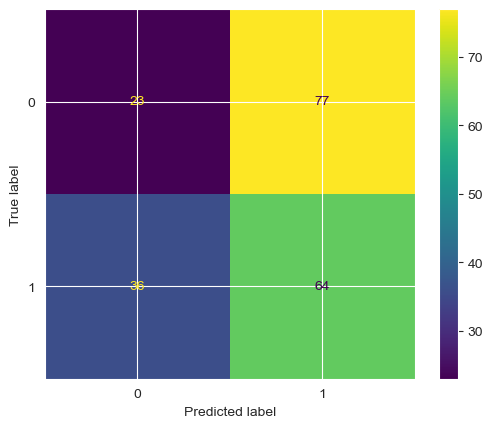

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(actual_test_class,  testPredict_Isolation_forest_1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




# Autoencoder pytorch

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2023-04-24 23:44:44.310510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
bsz=16
dataloader_train = torch.utils.data.DataLoader(X_train, batch_size= bsz, shuffle=True)# , drop_last=True)
dataloader_test  = torch.utils.data.DataLoader( X_test, batch_size=1, shuffle=False) 

In [40]:
# class Autoencoder(nn.Module):
    
#     def __init__(self, input_size, latent_size):
#         super(Autoencoder, self).__init__()
#         self.encoder_1 = nn.Linear(input_size, 106)
#         self.encoder_2 = nn.Linear(106, 56)
#         self.encoder_3 = nn.Linear(56, latent_size)

#         self.decoder_1 = nn.Linear(latent_size, 56)
#         self.decoder_2 = nn.Linear(56, 106)
#         self.decoder_3 = nn.Linear(106, input_size)
        
#     def encoder(self, x):
#         x = torch.relu(self.encoder_1(x))
#         x = torch.relu(self.encoder_2(x))
#         return torch.relu(self.encoder_3(x))
    
    
#     def decoder(self, z):
#         x = torch.relu(self.decoder_1(z))
#         x = torch.relu(self.decoder_2(x))
#         return torch.relu(self.decoder_3(x))
    

#     def forward(self, x):
#         # Encoding
#         x = torch.relu(self.encoder_1(x))
#         x = torch.relu(self.encoder_2(x))
#         x = torch.relu(self.encoder_3(x))

#         #Decoding
#         x = torch.relu(self.decoder_1(x))
#         x = torch.relu(self.decoder_2(x))
#         return torch.relu(self.decoder_3(x))

# Mish modules

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data.sampler import SubsetRandomSampler
class Mish(nn.Module):
    r"""
    Mish activation function is proposed in "Mish: A Self 
    Regularized Non-Monotonic Neural Activation Function" 
    paper, https://arxiv.org/abs/1908.08681.
    """

    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x * torch.tanh(F.softplus(x))
    
    

In [42]:
def mish(x):
    return (x*torch.tanh(F.softplus(x)))

In [43]:
class Autoencoder(nn.Module):
    
    def __init__(self, input_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder_1 = nn.Linear(input_size, 106)
        self.encoder_2 = nn.Linear(106, 56)
        self.encoder_3 = nn.Linear(56, latent_size)

        self.decoder_1 = nn.Linear(latent_size, 56)
        self.decoder_2 = nn.Linear(56, 106)
        self.decoder_3 = nn.Linear(106, input_size)
        
    def encoder(self, x):
        x = mish(self.encoder_1(x))
        x = mish(self.encoder_2(x))
        return mish(self.encoder_3(x))
    
    
    def decoder(self, z):
        x = mish(self.decoder_1(z))
        x = mish(self.decoder_2(x))
        return mish(self.decoder_3(x))
    

    def forward(self, x):
        # Encoding
        x = mish(self.encoder_1(x))
        x = mish(self.encoder_2(x))
        x = mish(self.encoder_3(x))

        #Decoding
        x = mish(self.decoder_1(x))
        x = mish(self.decoder_2(x))
        return mish(self.decoder_3(x))

In [44]:
train = True

lr= 0.001 #1e-3 #0.001
test_iterations=3
model_params = {
    'input_size' : 160,
    'latent_size': 4
}
training_params = {
    'epochs': 50,
    'early_stopping_patience': 50,
    'early_stopping_delta': 0.001
}

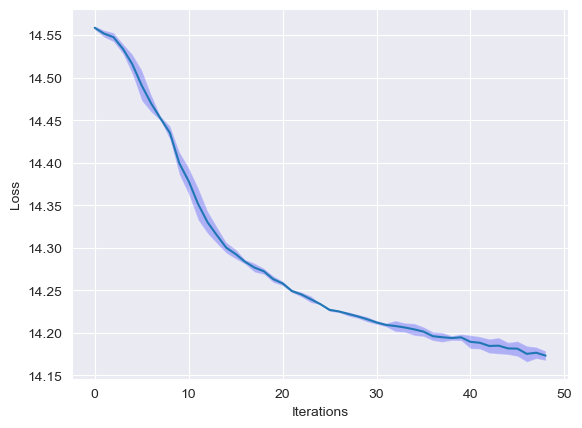

In [45]:
models_classical = []
loss_func = nn.MSELoss()
#from torchmetrics import MeanSquaredLogError
#loss_func = MeanSquaredLogError()

# class MSLELoss(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.mse = nn.MSELoss()
        
#     def forward(self, pred, actual):
#         return (self.mse(torch.log(pred + 1), torch.log(actual + 1)))
    
# loss_func = MSLELoss()

if train:
    losses_classical = [[0] * training_params['epochs']]
    for _ in range(test_iterations):
        model_classical = Autoencoder(**model_params)
        optimizer = torch.optim.Adam(model_classical.parameters(), lr=lr)
        
        best_model_classical, loss_classical = utils.train(model_classical, optimizer, loss_func, dataloader_train, **training_params)
        losses_classical.append(loss_classical)
        models_classical.append(best_model_classical)
        
    for i, model in enumerate(models_classical):
        torch.save(model.state_dict(), './models/classical_{}.pt'.format(i))

    sigma_classical = np.std(losses_classical[1:], axis=0)[1:]
    mean_classical  = np.mean(losses_classical[1:], axis=0)[1:]

    plt.plot(mean_classical)
    plt.fill_between(np.arange(0, training_params['epochs'] - 1), mean_classical + sigma_classical, mean_classical - sigma_classical, facecolor='blue', alpha=0.25)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

In [46]:
models_classical[0].state_dict()

OrderedDict([('encoder_1.weight',
              tensor([[-0.0152,  0.0499, -0.0312,  ..., -0.0228,  0.0056, -0.0206],
                      [-0.0502, -0.0126, -0.0579,  ...,  0.0250,  0.0550,  0.0010],
                      [ 0.0391,  0.0263, -0.1027,  ...,  0.0091, -0.0705,  0.0470],
                      ...,
                      [ 0.0398,  0.1249, -0.0259,  ..., -0.0028, -0.0255,  0.1104],
                      [ 0.0920,  0.0969, -0.0010,  ..., -0.0206, -0.0162,  0.0092],
                      [-0.0996, -0.0605, -0.0404,  ..., -0.1025, -0.0959, -0.0028]])),
             ('encoder_1.bias',
              tensor([ 0.0538,  0.0947,  0.0718, -0.0272,  0.0082,  0.0182, -0.0908,  0.0382,
                       0.0676,  0.0845,  0.0537, -0.0091,  0.0344,  0.0679,  0.0579,  0.0016,
                       0.0737, -0.0215, -0.0462,  0.0053,  0.0489,  0.0128,  0.0021, -0.0616,
                      -0.0157,  0.0423, -0.0811, -0.0132,  0.0408,  0.0939, -0.0071, -0.0247,
                      -0

In [47]:
torch.save(models_classical[0].state_dict(), "test_classical_AE_big.pt")

In [48]:
model_classical_AE = Autoencoder(**model_params)
model_classical_AE.load_state_dict(torch.load("test_classical_AE_big.pt"))

<All keys matched successfully>

In [49]:
model_classical_AE.state_dict()

OrderedDict([('encoder_1.weight',
              tensor([[-0.0152,  0.0499, -0.0312,  ..., -0.0228,  0.0056, -0.0206],
                      [-0.0502, -0.0126, -0.0579,  ...,  0.0250,  0.0550,  0.0010],
                      [ 0.0391,  0.0263, -0.1027,  ...,  0.0091, -0.0705,  0.0470],
                      ...,
                      [ 0.0398,  0.1249, -0.0259,  ..., -0.0028, -0.0255,  0.1104],
                      [ 0.0920,  0.0969, -0.0010,  ..., -0.0206, -0.0162,  0.0092],
                      [-0.0996, -0.0605, -0.0404,  ..., -0.1025, -0.0959, -0.0028]])),
             ('encoder_1.bias',
              tensor([ 0.0538,  0.0947,  0.0718, -0.0272,  0.0082,  0.0182, -0.0908,  0.0382,
                       0.0676,  0.0845,  0.0537, -0.0091,  0.0344,  0.0679,  0.0579,  0.0016,
                       0.0737, -0.0215, -0.0462,  0.0053,  0.0489,  0.0128,  0.0021, -0.0616,
                      -0.0157,  0.0423, -0.0811, -0.0132,  0.0408,  0.0939, -0.0071, -0.0247,
                      -0

In [50]:
best_model_ae=models_classical[0]
best_model_ae=model_classical_AE

In [51]:
def get_predictions_ae(best_model_ae, data_input):
    dataloader_data = torch.utils.data.DataLoader(data_input, batch_size= 1, shuffle=False)
    best_model_ae.eval()
    test_output = []
    with torch.no_grad():
        for data in dataloader_data:
            q = best_model_ae.encoder(data.float())
            output = best_model_ae.decoder(q).float()
            test_output.append(output.numpy())
    Pred_output = np.array(test_output).squeeze()
    return Pred_output

In [52]:
len(get_predictions_ae(best_model_ae, X_train))

800

In [53]:
def find_threshold_ae(actual_data):
    predictions_from_training = get_predictions_ae(best_model_ae, actual_data)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.mse(predictions_from_training, actual_data)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
    return threshold

In [54]:
def find_threshold_ae_two(actual_data):
    # another method to find threshold
    predictions_from_training = get_predictions_ae(best_model_ae, actual_data)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.mse(predictions_from_training, actual_data)

    threshold_2 = np.percentile(reconstruction_errors, 95)#try from 95
    return threshold_2

In [55]:
threshold=find_threshold_ae(X_train)
threshold

2023-04-24 23:45:09.100469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.0862733500781086

In [56]:
threshold_2=find_threshold_ae_two(X_train)
threshold_2

0.09038859773524323

In [57]:
def final_predictions_ae(predictions_test, x_test_scaled, threshold):
    #predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    errors = tf.keras.losses.mse(predictions_test, x_test_scaled)
    # 1 = anomaly, 0 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
    return preds

In [64]:
predictions_test=get_predictions_ae(best_model_ae, X_test)
preds = final_predictions_ae(predictions_test, X_test, threshold-0.0075)
accuracy_score(actual_test_class, preds)

0.455

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(actual_test_class, preds))
print('recall : %.3f' % recall_score(actual_test_class, preds))
print('F1 : %.3f' % f1_score(actual_test_class, preds))

Precision: 0.469
recall : 0.680
F1 : 0.555


[[23 77]
 [32 68]]


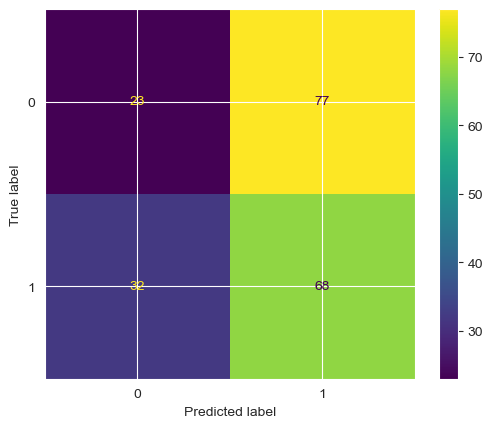

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(actual_test_class, preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# quantum autoencoder

In [187]:
bsz=16
dataloader_train = torch.utils.data.DataLoader(X_train, batch_size= bsz, shuffle=True)# , drop_last=True)
dataloader_test  = torch.utils.data.DataLoader( X_test, batch_size=1, shuffle=False) 

In [188]:
train = True

lr= 0.001 #1e-3 #0.001
test_iterations=3
model_params = {
    'input_size' : 160,
    'latent_size': 4
}
training_params = {
    'epochs': 15,
    'early_stopping_patience': 15,
    'early_stopping_delta': 0.001
}

In [189]:
from src import models, base, utils, testers, grad


In [190]:
class LatentCircuit(base.QuantumBase):

    def __init__(self, n_qubits):
        super(LatentCircuit, self).__init__(n_qubits)
        all_qubits = np.arange(self.n_qubits)
        
        self.add_IQP_embedding_layer()
        self.add_rotation_random_layer()
        self.add_cnot_layer()
        self.add_rotation_random_layer()
        self.add_cnot_layer(order='reverse')
        self.circuit.h(all_qubits)
        
        self.name = 'iqp_rrandom_cnot_rrandom_cnot_h'
        self.add_single_measurements(pauli='Z')
        
class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, n_qubits):
        super(Hybrid, self).__init__()
        self.quantum_circuit = LatentCircuit(n_qubits)
        
        params_len = len(self.quantum_circuit.params)
        self.thetas = nn.Parameter(torch.rand(params_len) * 0.001)
        
    def forward(self, inputs):
        return grad.ParameterShiftGradFunction.apply(
            self.thetas, 
            inputs,
            self.quantum_circuit)

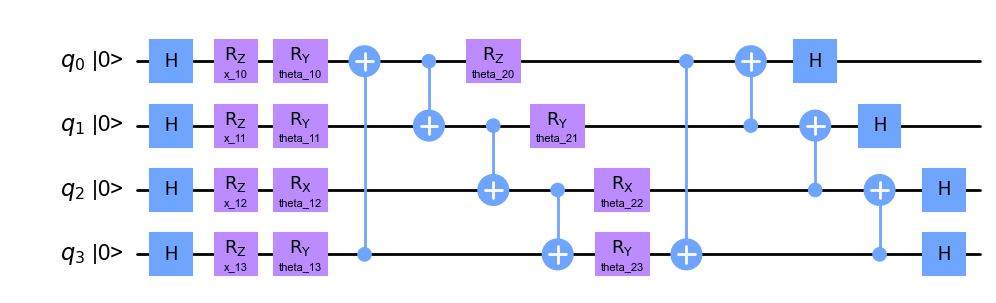

In [191]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(LatentCircuit(4).circuit, output='mpl', initial_state=True)

In [192]:
len(LatentCircuit(4).params)

8

Test iteration 0 is process...
Training [  0%]  Loss: 21.692
Training [ 20%]  Loss: 14.551
Training [ 40%]  Loss: 14.517
Training [ 60%]  Loss: 14.515
Training [ 80%]  Loss: 14.528
Test iteration 1 is process...
Training [  0%]  Loss: 21.358
Training [ 20%]  Loss: 14.517
Training [ 40%]  Loss: 14.506
Training [ 60%]  Loss: 14.504
Training [ 80%]  Loss: 14.497
Test iteration 2 is process...
Training [  0%]  Loss: 20.963
Training [ 20%]  Loss: 14.504
Training [ 40%]  Loss: 14.504
Training [ 60%]  Loss: 14.5
Training [ 80%]  Loss: 14.534


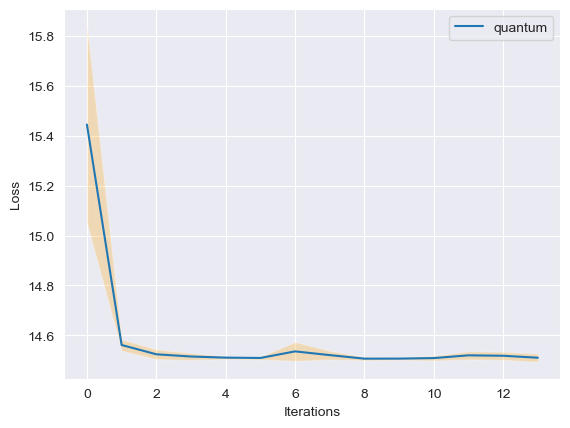

In [193]:
models_quantum = []
loss_func = nn.MSELoss()


if train:
    losses_quantum = [[0] * training_params['epochs']]
    models_quantum = []
    for i in range(test_iterations):
        print('Test iteration {} is process...'.format(i))
        model_quantum = models.QuantumAutoencoder(quantum_classical=Hybrid,**model_params)
        optimizer = torch.optim.Adam(model_quantum.parameters(), lr=lr)
        
        best_model_quantum, loss_quantum = utils.train(model_quantum, optimizer, loss_func, dataloader_train,
                                                       verbose=True, 
                                                       X_test=shuffle(X_test), latent_size=model_params['latent_size'],
                                                       **training_params)
        losses_quantum.append(loss_quantum)
        models_quantum.append(best_model_quantum)

    for i, model in enumerate(models_quantum):
        torch.save(model.state_dict(), './models/{}_{}.pt'.format(model.hybrid.quantum_circuit.name, i))

    sigma_quantum = np.std(losses_quantum[1:], axis=0)[1:]
    mean_quantum  = np.mean(losses_quantum[1:], axis=0)[1:]

    #plt.plot(mean_classical, label='classical')
    #plt.fill_between(np.arange(0, training_params['epochs'] - 1), mean_classical + sigma_classical, mean_classical - sigma_classical, facecolor='blue', alpha=0.25)
    plt.plot(mean_quantum, label='quantum')
    plt.fill_between(np.arange(0, training_params['epochs'] - 1), mean_quantum + sigma_quantum, mean_quantum - sigma_quantum, facecolor='orange', alpha=0.25)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()

In [195]:
#np.save('losses_quantum_ae_big.npy', np.array(losses_quantum[1:])) 
### check for losses_quantum_ae_big.npy for losses from qae from data big

In [196]:
if len(models_quantum) == 0:
    for i in range(test_iterations):
        model = models.QuantumAutoencoder(quantum_classical=Hybrid,**model_params)
        model.load_state_dict(torch.load('./models/{}_{}.pt'.format(model.hybrid.quantum_circuit.name, i)))
        models_quantum.append(model)

In [197]:
models_quantum[0]

QuantumAutoencoder(
  (encoder_1): Linear(in_features=160, out_features=106, bias=True)
  (encoder_2): Linear(in_features=106, out_features=56, bias=True)
  (encoder_3): Linear(in_features=56, out_features=4, bias=True)
  (hybrid): Hybrid()
  (decoder_1): Linear(in_features=4, out_features=56, bias=True)
  (decoder_2): Linear(in_features=56, out_features=106, bias=True)
  (decoder_3): Linear(in_features=106, out_features=160, bias=True)
)

In [198]:
models_quantum[0].state_dict()

OrderedDict([('encoder_1.weight',
              tensor([[ 0.1138,  0.0056,  0.0253,  ..., -0.0290,  0.0273, -0.0229],
                      [ 0.0808,  0.0205,  0.0772,  ...,  0.0920,  0.0849,  0.0645],
                      [ 0.0454,  0.0447,  0.1127,  ...,  0.0015, -0.0067,  0.1042],
                      ...,
                      [-0.0800, -0.0380,  0.0102,  ..., -0.0719, -0.0274,  0.0161],
                      [ 0.1139, -0.0212,  0.0176,  ...,  0.0561,  0.0162,  0.0743],
                      [-0.0407,  0.0240, -0.0296,  ..., -0.0017,  0.0389,  0.0012]])),
             ('encoder_1.bias',
              tensor([ 0.0508,  0.0424,  0.0267, -0.0124,  0.0846, -0.0098,  0.0149, -0.0317,
                       0.0719,  0.0235, -0.0834,  0.1169,  0.0071,  0.0194, -0.0516, -0.0014,
                       0.1058,  0.0193,  0.0484, -0.0183,  0.0313,  0.0891, -0.0728, -0.0185,
                       0.0003,  0.0311,  0.0352, -0.0799,  0.0730,  0.0818, -0.0302,  0.0759,
                       0

In [199]:
#torch.save(models_quantum[0].state_dict(), "test_Quantum_AE_big.pt")
torch.save(models_quantum[0].state_dict(), "test_Quantum_AE_big.pt")

In [200]:
#model_quantum_AE = models_quantum[0]
model_quantum_AE = models.QuantumAutoencoder(quantum_classical=Hybrid,**model_params)
model_quantum_AE.load_state_dict(torch.load("test_Quantum_AE_big.pt"))

<All keys matched successfully>

In [201]:
model_quantum_AE.state_dict()

OrderedDict([('encoder_1.weight',
              tensor([[ 0.1138,  0.0056,  0.0253,  ..., -0.0290,  0.0273, -0.0229],
                      [ 0.0808,  0.0205,  0.0772,  ...,  0.0920,  0.0849,  0.0645],
                      [ 0.0454,  0.0447,  0.1127,  ...,  0.0015, -0.0067,  0.1042],
                      ...,
                      [-0.0800, -0.0380,  0.0102,  ..., -0.0719, -0.0274,  0.0161],
                      [ 0.1139, -0.0212,  0.0176,  ...,  0.0561,  0.0162,  0.0743],
                      [-0.0407,  0.0240, -0.0296,  ..., -0.0017,  0.0389,  0.0012]])),
             ('encoder_1.bias',
              tensor([ 0.0508,  0.0424,  0.0267, -0.0124,  0.0846, -0.0098,  0.0149, -0.0317,
                       0.0719,  0.0235, -0.0834,  0.1169,  0.0071,  0.0194, -0.0516, -0.0014,
                       0.1058,  0.0193,  0.0484, -0.0183,  0.0313,  0.0891, -0.0728, -0.0185,
                       0.0003,  0.0311,  0.0352, -0.0799,  0.0730,  0.0818, -0.0302,  0.0759,
                       0

In [202]:
def get_predictions_qae(best_model_qae, data_input):
    dataloader_data = torch.utils.data.DataLoader(data_input, batch_size= 1, shuffle=False)
    best_model_qae.eval()
    test_output = []
    with torch.no_grad():
        for data in dataloader_data:
            output = best_model_qae(data.float())
            test_output.append(output.numpy())
    Pred_output = np.array(test_output).squeeze()
    return Pred_output

In [203]:
predictions_train=get_predictions_qae(models_quantum[0], X_train)

In [204]:
def find_threshold_qae(actual_data):
    predictions_from_training = get_predictions_qae(best_model_qae, actual_data)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.mse(predictions_from_training, actual_data)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
    return threshold

def find_threshold_qae_two(actual_data):
    # another method to find threshold
    predictions_from_training = get_predictions_qae(best_model_qae, actual_data)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.mse(predictions_from_training, actual_data)

    threshold_2 = np.percentile(reconstruction_errors, 95)#try from 95
    return threshold_2

In [205]:
best_model_qae=model_quantum_AE

In [206]:
threshold=find_threshold_qae(X_train)
threshold

0.09010155316288691

In [207]:
threshold_2=find_threshold_qae_two(X_train)
threshold_2

0.09389968322182272

In [208]:
def final_predictions_qae(predictions_test, x_test_scaled, threshold):
    #predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    #predictions_test=get_predictions_vae(best_model_vae, X_test)
    errors = tf.keras.losses.mse(predictions_test, x_test_scaled)
    # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
    return preds

In [226]:
predictions_test=get_predictions_qae(best_model_qae, X_test)

preds_qae = final_predictions_qae(predictions_test, X_test, threshold-0.01)
accuracy_score(actual_test_class, preds_qae)

0.45

[[19 81]
 [29 71]]


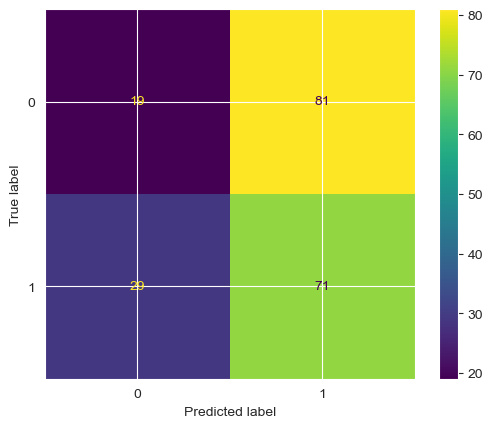

In [227]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(actual_test_class, preds_qae)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [228]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(actual_test_class, preds_qae))
print('recall : %.3f' % recall_score(actual_test_class, preds_qae))
print('F1 : %.3f' % f1_score(actual_test_class, preds_qae))

Precision: 0.467
recall : 0.710
F1 : 0.563


# Further analysis

In [212]:
# wholeData=np.load("big_data.npy")
# X_test=np.load("X_test_big.npy")
# X_train=np.load("X_train_big.npy")
# actual_test_class=np.load("actual_test_class_big.npy")
Y_test=actual_test_class

In [213]:
Y_train=np.zeros(len(X_train))
#Y_train
testY=Y_test

whole_train_data=np.c_[ X_train, Y_train]
whole_test_data=np.c_[ X_test, Y_test]

# Latent codes

In [214]:
import copy
import numpy as np
import torch

from sklearn.cluster import DBSCAN, OPTICS
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

def get_latent_code(model, latent_size, loss_func, X):
    latent_code = {}
    def get_latent_code(name):
        def hook(model, input, output):
            latent_code[name] = input[0]
        return hook

    model.decoder_1.register_forward_hook(get_latent_code('decoder_1'))

    model.eval()
    with torch.no_grad():
        latent_codes = np.array([[0] * latent_size])
        losses = []
        for _, data in enumerate(torch.utils.data.DataLoader( X, batch_size=1, shuffle=False)):
            output = model(data.float())
            loss = torch.sqrt(loss_func(output, data.float()))
            latent_codes = np.append(latent_codes, np.array(latent_code['decoder_1'].tolist()), axis=0)
            losses.append(loss.item())
    return latent_codes[1:], losses

# Latent code quantum

In [215]:
loss_func = nn.MSELoss()
latent_codes_quantum, losses_quantum = utils.get_latent_code(model_quantum_AE, model_params['latent_size'], loss_func, X_test)
#anomaly_quantum = utils.get_anomalies_forest(latent_codes_quantum)
anomaly_quantum = actual_test_class
latent_codes_quantum_train, losses_quantum_train = utils.get_latent_code(model_quantum_AE, model_params['latent_size'], loss_func, X_train)
anomaly_quantum_train = Y_train

all_unique_tupes = [(i, j) for i in range(0, model_params['latent_size'] + 1) for j in range(i, model_params['latent_size']) if i != j]
n_rows = 2
n_columns = int((len(all_unique_tupes) + 1) / 2)


In [216]:
np.save('latent_codes_quantum_big.npy', latent_codes_quantum) 
np.save('latent_codes_quantum_train_big.npy', latent_codes_quantum_train) 

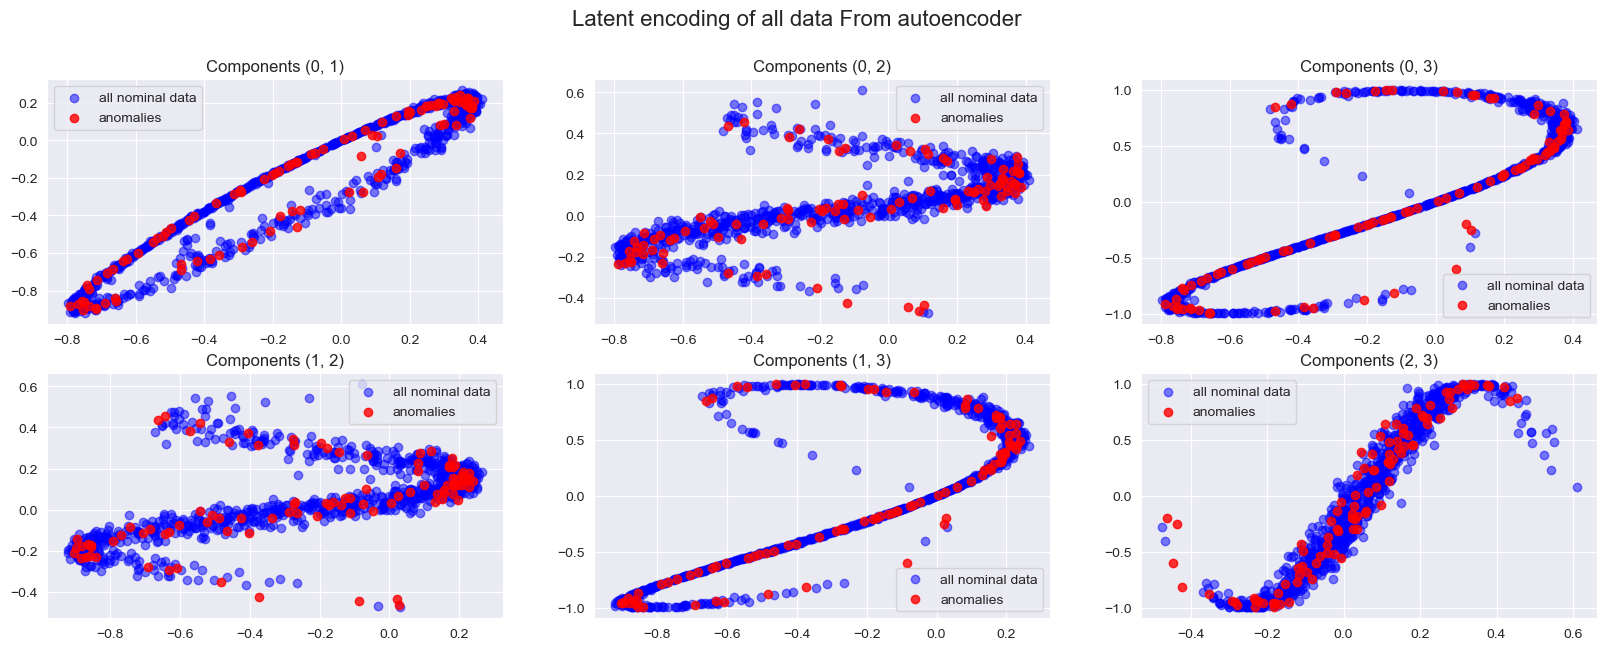

In [217]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 7))
fig.suptitle('Latent encoding of all data From autoencoder', fontsize=16)

for index, (i, j) in enumerate(all_unique_tupes):
    row = int(index > n_columns - 1)
    column = index - row * n_columns

    axes[row, column].scatter(x=latent_codes_quantum_train[:,i], y=latent_codes_quantum_train[:,j], color="blue", alpha=0.5, label='all nominal data')
    axes[row, column].scatter(x=latent_codes_quantum[anomaly_quantum == 0,i], y=latent_codes_quantum[anomaly_quantum == 0,j], alpha=0.5, color="blue")#, label='all test data')

    axes[row, column].scatter(x=latent_codes_quantum[anomaly_quantum == 1, i], y=latent_codes_quantum[anomaly_quantum == 1, j], alpha=0.8, color="red", label='anomalies')
    axes[row, column].set_title("Components " + str((i, j)))
    axes[row, column].legend()

In [218]:
#fig.savefig('Latent_HAE_big.pdf' ,bbox_inches='tight')

# PCA

In [29]:
X_train=np.load('X_train_big.npy') 
X_test=np.load('X_test_big.npy') 
actual_test_class=np.load('actual_test_class_big.npy') 
Y_train=np.zeros(len(X_train))


In [30]:
whole_train_test_main_part=np.concatenate([X_train,X_test])
#len(whole_train_test_main_part[0])
whole_labels=np.concatenate([Y_train,actual_test_class])
#whole_labels

In [31]:
import sklearn.decomposition as sd
import sklearn.preprocessing as sp

nb_pc=4

acp = sd.PCA()
#data = subgrid_feats_cleaned_df

pca = sd.PCA(nb_pc).fit(whole_train_test_main_part)
X_pca = pca.transform(whole_train_test_main_part)

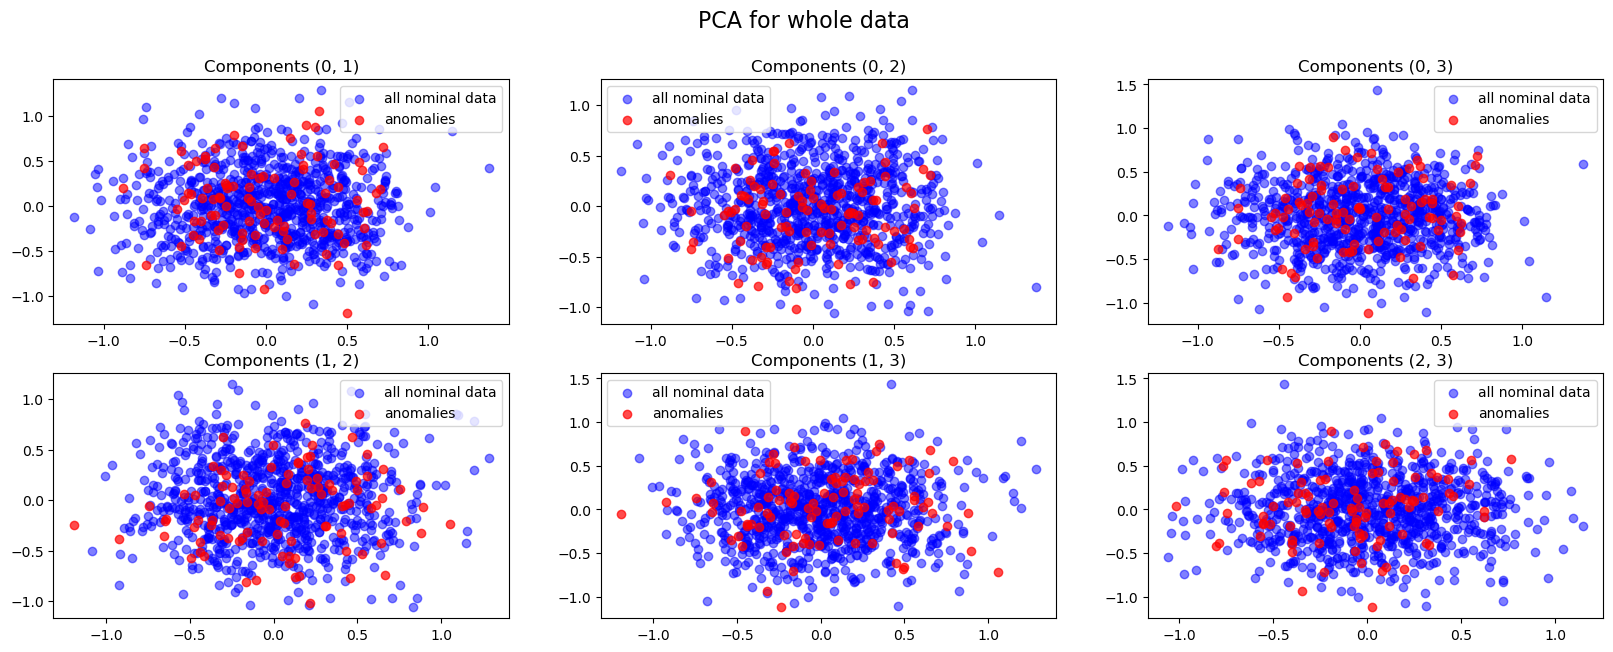

In [32]:
latent_codes_pca = X_pca
#anomaly_quantum = utils.get_anomalies_forest(latent_codes_quantum)
anomaly_pca = whole_labels

all_unique_tupes = [(i, j) for i in range(0, nb_pc + 1) for j in range(i, nb_pc) if i != j]
n_rows = 2
n_columns = int((len(all_unique_tupes) + 1) / 2)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 7))
fig.suptitle('PCA for whole data', fontsize=16)

for index, (i, j) in enumerate(all_unique_tupes):
    row = int(index > n_columns - 1)
    column = index - row * n_columns

    #axes[row, column].scatter(x=latent_codes_pca[:,i], y=latent_codes_pca[:,j], alpha=0.5, label='all test data')
    axes[row, column].scatter(x=latent_codes_pca[anomaly_pca == 0,i], y=latent_codes_pca[anomaly_pca == 0,j], alpha=0.5, color="blue", label='all nominal data')
    axes[row, column].scatter(x=latent_codes_pca[anomaly_pca == 1, i], y=latent_codes_pca[anomaly_pca == 1, j], alpha=0.7, color="red", label='anomalies')
    axes[row, column].set_title("Components " + str((i, j)))
    axes[row, column].legend()

In [33]:
np.save('X_pca_original_big.npy', X_pca) 


In [34]:
len(X_pca)

1000

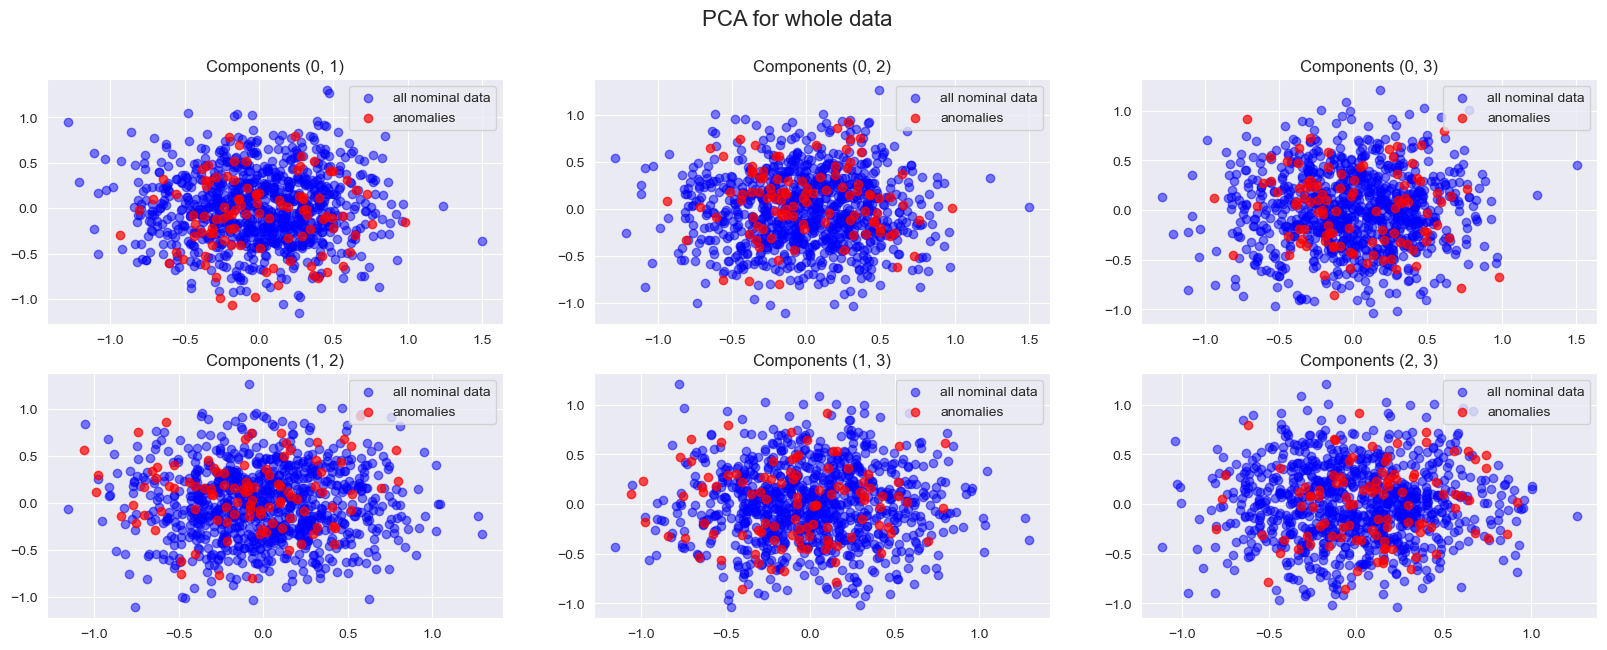

In [221]:
latent_codes_pca = X_pca
#anomaly_quantum = utils.get_anomalies_forest(latent_codes_quantum)
anomaly_pca = whole_labels

all_unique_tupes = [(i, j) for i in range(0, nb_pc + 1) for j in range(i, nb_pc) if i != j]
n_rows = 2
n_columns = int((len(all_unique_tupes) + 1) / 2)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 7))
fig.suptitle('PCA for whole data', fontsize=16)

for index, (i, j) in enumerate(all_unique_tupes):
    row = int(index > n_columns - 1)
    column = index - row * n_columns

    #axes[row, column].scatter(x=latent_codes_pca[:,i], y=latent_codes_pca[:,j], alpha=0.5, label='all test data')
    axes[row, column].scatter(x=latent_codes_pca[anomaly_pca == 0,i], y=latent_codes_pca[anomaly_pca == 0,j], alpha=0.5, color="blue", label='all nominal data')
    axes[row, column].scatter(x=latent_codes_pca[anomaly_pca == 1, i], y=latent_codes_pca[anomaly_pca == 1, j], alpha=0.7, color="red", label='anomalies')
    axes[row, column].set_title("Components " + str((i, j)))
    axes[row, column].legend()

In [222]:
fig.savefig('Latent_PCA_big.pdf', bbox_inches='tight')

# Latent space Classical AE

In [223]:
loss_func = nn.MSELoss()
latent_codes_classical, losses_classical = utils.get_latent_code(model_classical_AE, model_params['latent_size'], loss_func, X_test)
#anomaly_quantum = utils.get_anomalies_forest(latent_codes_quantum)
anomaly_classical = actual_test_class
latent_codes_classical_train, losses_classical_train = utils.get_latent_code(model_classical_AE, model_params['latent_size'], loss_func, X_train)
anomaly_classical_train = Y_train

all_unique_tupes = [(i, j) for i in range(0, model_params['latent_size'] + 1) for j in range(i, model_params['latent_size']) if i != j]
n_rows = 2
n_columns = int((len(all_unique_tupes) + 1) / 2)

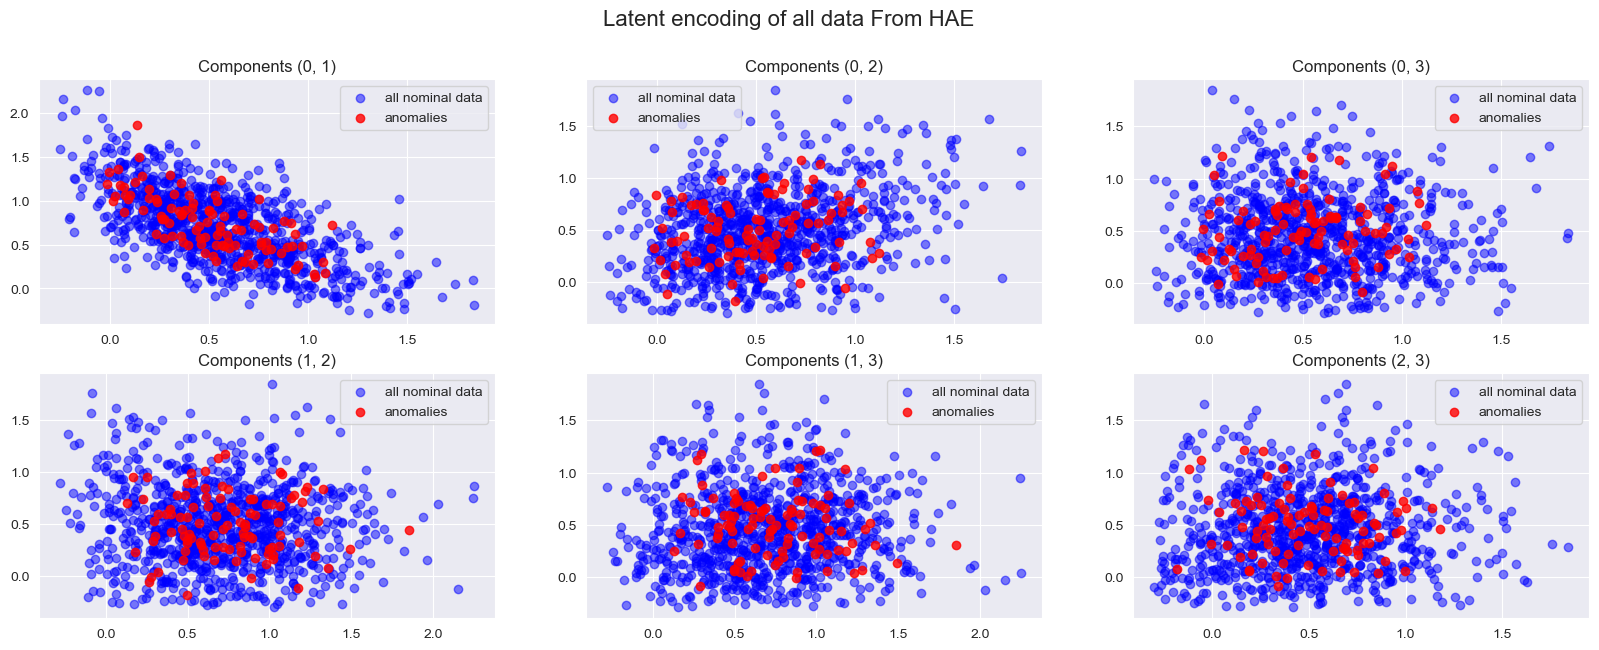

In [224]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 7))
fig.suptitle('Latent encoding of all data From HAE', fontsize=16)

for index, (i, j) in enumerate(all_unique_tupes):
    row = int(index > n_columns - 1)
    column = index - row * n_columns

    axes[row, column].scatter(x=latent_codes_classical_train[:,i], y=latent_codes_classical_train[:,j], color="blue", alpha=0.5, label='all nominal data')
    axes[row, column].scatter(x=latent_codes_classical[anomaly_classical == 0,i], y=latent_codes_classical[anomaly_classical == 0,j], alpha=0.5, color="blue")#, label='all test data')

    axes[row, column].scatter(x=latent_codes_classical[anomaly_classical == 1, i], y=latent_codes_classical[anomaly_classical == 1, j], alpha=0.8, color="red", label='anomalies')
    axes[row, column].set_title("Components " + str((i, j)))
    axes[row, column].legend()

In [225]:
np.save('latent_codes_classical_big.npy', latent_codes_classical) 
np.save('latent_codes_classicaltrain_big.npy', latent_codes_classical_train) 
#anomaly_classical